In [451]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
billets_production = pd.read_csv("billets_production.csv")
billets = pd.read_csv("billets.csv", delimiter=";")

EDA

In [452]:
#billets_production.shape
#billets_production.describe
billets_production#.dtypes

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [453]:
billets#.dtypes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [454]:
print(billets['is_genuine'].value_counts())
print(billets['is_genuine'].loc[billets['is_genuine']==True].value_counts())
print(billets['is_genuine'].loc[billets['is_genuine']==False].value_counts())
print(billets[billets['is_genuine'].isnull()])
print(billets[billets['is_genuine'].isnull()].count()) #pas de valeur vide dans is_genuine

True     1000
False     500
Name: is_genuine, dtype: int64
True    1000
Name: is_genuine, dtype: int64
False    500
Name: is_genuine, dtype: int64
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [455]:
is_genuine_df = billets.drop_duplicates(subset ="is_genuine", keep = 'first', inplace=False)
is_genuine_df # pas d'autres termes que True or False dans is_genuine

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1000,False,172.28,103.95,103.91,4.78,3.31,111.40


In [456]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [457]:
billets_True_df = billets.loc[billets['is_genuine']==True].describe()
billets_True_df

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [458]:
billets_False_df = billets.loc[billets['is_genuine']==False].describe()
billets_False_df

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


In [459]:
print(billets[billets['margin_low'].isnull()].head(3))
print(billets[billets['margin_low'].isnull()].count()) # 37 valeurs manquantes dans margin_low   
billets_dropna_df = billets.dropna() # regression logistique
#billets_dropna_df # reste 1463 valeurs

     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
is_genuine      37
diagonal        37
height_left     37
height_right    37
margin_low       0
margin_up       37
length          37
dtype: int64


Imputation par régression linéaire 

In [460]:
#regression linéaire 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
m = 1463

billets_null_df = billets[billets['margin_low'].isnull()].drop(['is_genuine'], axis=1)
billets_null_df
#Xtest = billets_null_df.drop(['is_genuine'], axis=1)
X = billets_null_df.drop(['margin_low'], axis=1)#Xtest = billets_null_df.drop(['margin_low'], axis=1)
X_df = billets.dropna().drop(['is_genuine','margin_low'], axis=1)#Xtrain_df = billets.dropna().drop(['is_genuine','margin_low'], axis=1)
X = X_df.values.reshape(m,5)#Xtrain = Xtrain_df.values.reshape(m,5)
Columns_name = X_df.columns#Columns_name = Xtrain_df.columns
y = billets['margin_low'].dropna().values.reshape(m,1)#ytrain = billets['margin_low'].dropna().values.reshape(m,1)

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(X), columns= Columns_name) #Xtrain

Xtrain,Xtest,ytrain,ytest = train_test_split(features,y, test_size = 0.2)

model = LinearRegression() #elasticnet / randomforest / autre methode 
model.fit(Xtrain,ytrain)
model.score(Xtrain,ytrain) #r2
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)
features = pd.DataFrame(pred_train)

In [461]:
print('score LinearRegression ',round(model.score(Xtest, ytest),3)*100,"%")#(ytrain, ytrained))

score LinearRegression  50.0 %


In [462]:
residuals = ytest-pred_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals ",mean_residuals)
residuals_df = pd.DataFrame(ytest)-pd.DataFrame(pred_test)

Mean of Residuals  -0.01071848052645773


On veut faire un test statistique pour verifier que léchantillon suit une loi Normale. 
soit H0 : léchantillon suit une loi Normale
     H1 : léchantillon ne suit pas une loi Normale

In [463]:
X1=residuals_df#billets_impute_df['margin_low']
from scipy.stats import shapiro
X1, pval1 = shapiro(X1)
#x2, pval2 = shapiro(X2)
print(pval1)
print("p-values",pval1)
if pval1<0.05: #alpha value 5%
    print("on rejette l'hypothese 0. L'échantillon ne suit pas une loi Normale")
else: print("on accepte l'hypothese 0")

0.004069266840815544
p-values 0.004069266840815544
on rejette l'hypothese 0. L'échantillon ne suit pas une loi Normale


On veut faire un test de Breusch-Pagan pour verifier homoscédasticité des données. 
soit H0 : lhypothèse que léchantillon est homoscédasticique
     H1 : lhypothèse que léchantillon est hétéroscédasticique

In [464]:
#homoscédasticité 
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan as het
model = sm.OLS(y,X).fit() #num_pipeline  sm.OLS(y,X)
coef_homo, p1, coef_F, p2  = het(model.resid, model.model.exog)

#resultat_OLS = model.summary()
#print(hom_test)
print('coef_homo = %.3f, p1 = %.3f, coef_F = %.3f, p2 = %.3f\n'%(coef_homo, p1, coef_F, p2)) 
print("on accepte l'hypothese nulle")

coef_homo = 446.747, p1 = 0.000, coef_F = 128.188, p2 = 0.000

on accepte l'hypothese nulle


Dans cet exemple, la p value correspondante au coefficient dhomoscédasticité est inférieure à 0.05, on écarte donc lhypothèse nulle.

In [465]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [466]:
#Colinearité des variance 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('is_genuine ~ diagonal+height_left+height_right+margin_low+margin_up+length', data=billets, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

       variable            VIF
0     Intercept  592495.682281
1      diagonal       1.018610
2   height_left       1.151474
3  height_right       1.260286
4    margin_low       1.913278
5     margin_up       1.419672
6        length       2.131067


Tant que le VIF est inférieur à 10 on suspecte une absence de colinéarité entre les variables.
Dans le cas contraire nous aurions supprimé la variable en question.

In [467]:
#from sklearn.ensemble import RandomForestRegressor
#model2 = RandomForestRegressor() #elasticnet / randomforest / autre methode 
#model2.fit(features,ytrain)
#model2.score(features,ytrain) #r2
#ytrained2 = model2.predict(features)
#print('r2 score RandomForestRegressor',r2_score(ytrain, ytrained2))

In [468]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
billets_impute = billets.drop(['is_genuine'], axis=1)
Columns_name = billets_impute.columns
#billets_impute_df
num_pipeline = Pipeline(steps=[("scaler", StandardScaler()),
                                     ('imputer',IterativeImputer(estimator=LinearRegression(),
                                                                 missing_values=np.nan))])
                         #RandomForestRegressor
X_imputed = num_pipeline.fit_transform(billets_impute)

billets_impute_df = pd.DataFrame(X_imputed, columns = Columns_name)
print(billets_impute_df)

      diagonal  height_left  height_right  margin_low  margin_up    length
0    -0.486540     2.774123      3.163240    0.051286  -1.128325  0.173651
1    -1.633729    -2.236535     -0.799668   -1.078937  -0.696799  0.471666
2     2.397823     1.504756     -1.291191   -0.129549  -0.912562  0.551901
3    -1.961498    -0.399294      0.060498   -1.304982  -0.610494  0.953075
4    -0.748754     0.836669     -1.414072   -0.672057   1.417677 -0.158750
...        ...          ...           ...         ...        ...       ...
1495 -0.683201     1.170713      0.767063   -0.099410  -0.265273 -1.602978
1496  0.758981     2.005822      1.596509    1.181509   0.942999 -1.958303
1497 -0.519316    -0.065250      0.613462    1.543181   0.899846 -0.835016
1498  0.332882     0.836669      0.429141    1.030813   1.331372 -0.491152
1499 -1.600953     0.402412     -0.308144    0.217052   0.942999 -0.697470

[1500 rows x 6 columns]


In [469]:
print(billets_impute_df[billets_impute_df['margin_low'].isnull()].head(3))
print(billets_impute_df[billets_impute_df['margin_low'].isnull()].count()) 

Empty DataFrame
Columns: [diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


Zscore

In [470]:
from scipy import stats

zsc = stats.zscore(billets_dropna_df['diagonal'],#
                   nan_policy='omit') 
zscore_df = pd.merge(billets_dropna_df,zsc,
                                         left_index=True,
                     right_index=True).rename(columns={'diagonal_y': 'zscore'})
#zscore_df
pd.DataFrame(zscore_df[zscore_df['zscore']>=3],
             columns = ["is_genuine","zscore","diagonal_x"]).sort_values(by=['zscore'],
                                                                                  ascending=False).head(60)
#dans les attributs : diagonal et height_right
#true en valeur anormales zscore faut il les supprimer ?
# dans la vie normale on interrogerait et demanderait un retour expert métier

,is_genuine,zscore,diagonal_x
1277,False,3.441286,173.01
828,True,3.146545,172.92
842,True,3.048298,172.89
1022,False,3.048298,172.89


In [471]:
zsc = stats.zscore(billets_dropna_df['height_right'],#
                   nan_policy='omit') 
zscore_df = pd.merge(billets_dropna_df,zsc,
                                         left_index=True,
                     right_index=True).rename(columns={'height_right_y': 'zscore'})
#zscore_df
pd.DataFrame(zscore_df[zscore_df['zscore']>=3],
             columns = ["is_genuine","zscore","height_right_x"]).sort_values(by=['zscore'],
                                                                         ascending=False).head(60)

,is_genuine,zscore,height_right_x
0,True,3.173766,104.95
1484,False,3.173766,104.95


Normalité

In [472]:
X1=billets['diagonal']
X2=billets['height_left']
X3=billets['height_right']
X4=billets['margin_low']
X5=billets['margin_up']
X6=billets['length']

from scipy.stats import shapiro
x1, pval1 = shapiro(X1)
x2, pval2 = shapiro(X2)
x3, pval3 = shapiro(X3)
x4, pval4 = shapiro(X4)
x5, pval5 = shapiro(X5)
x6, pval6 = shapiro(X6)
print('diagonal',round(pval1,2))
print('height_left',round(pval2,2))
print('height_right',round(pval3,2))
print('margin_low',round(pval4,2))
print('margin_up',round(pval5,2))
print('length',round(pval6,2))
#X3 et X4 suivent une loi Normale height_right' et 'margin_low'

diagonal 0.32
height_left 0.05
height_right 0.98
margin_low 1.0
margin_up 0.0
length 0.0


In [473]:
DB1 = billets_dropna_df.drop(['is_genuine'],axis=1)
sns.pairplot(DB1.iloc[:,0:6])

Corrélations

In [474]:
#corrélations
DB_corr =billets_dropna_df.corr()
DB_corr

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


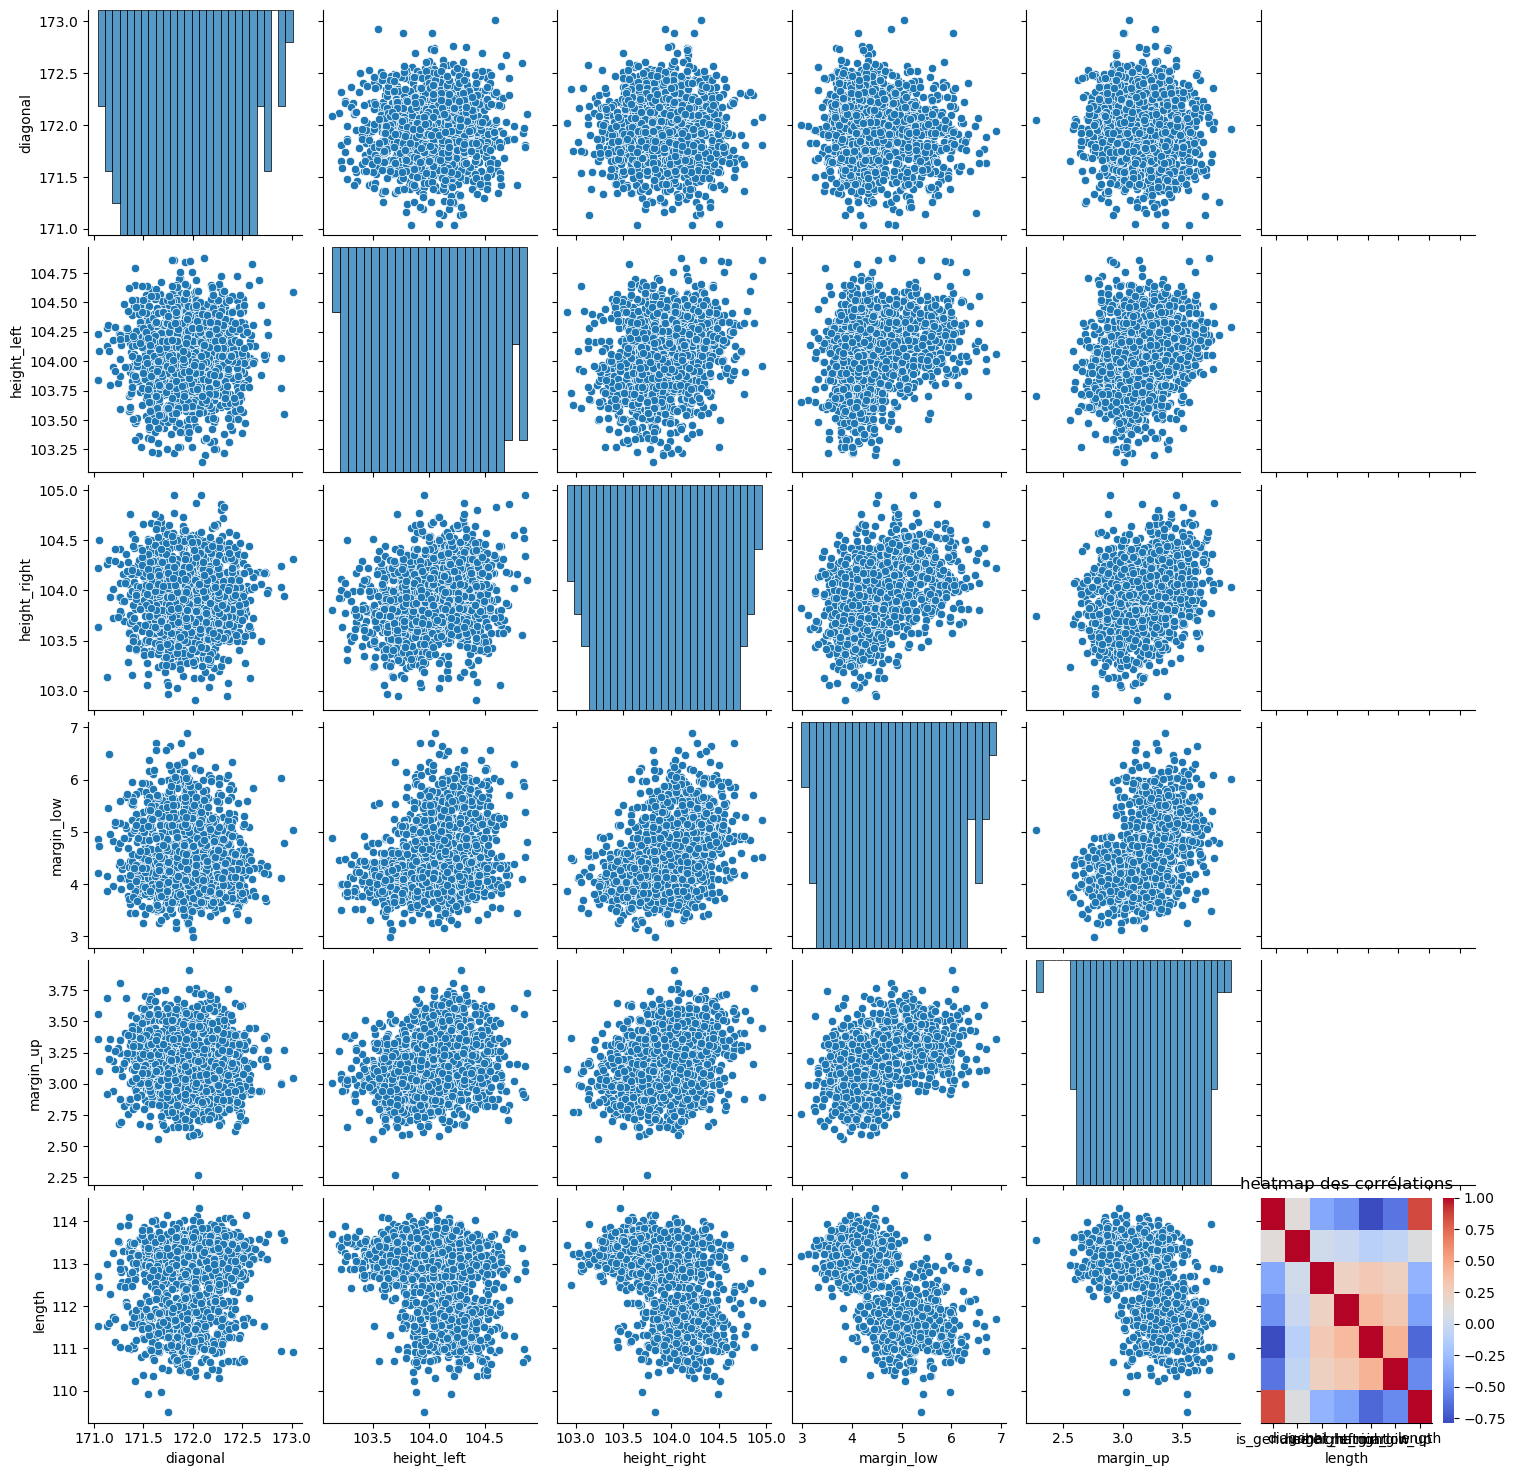

In [475]:
sns.heatmap(DB_corr, xticklabels = DB_corr.columns, yticklabels = DB_corr.columns, cmap = 'coolwarm')
plt.title('heatmap des corrélations')
plt.show()

Modélisation non supervisée

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


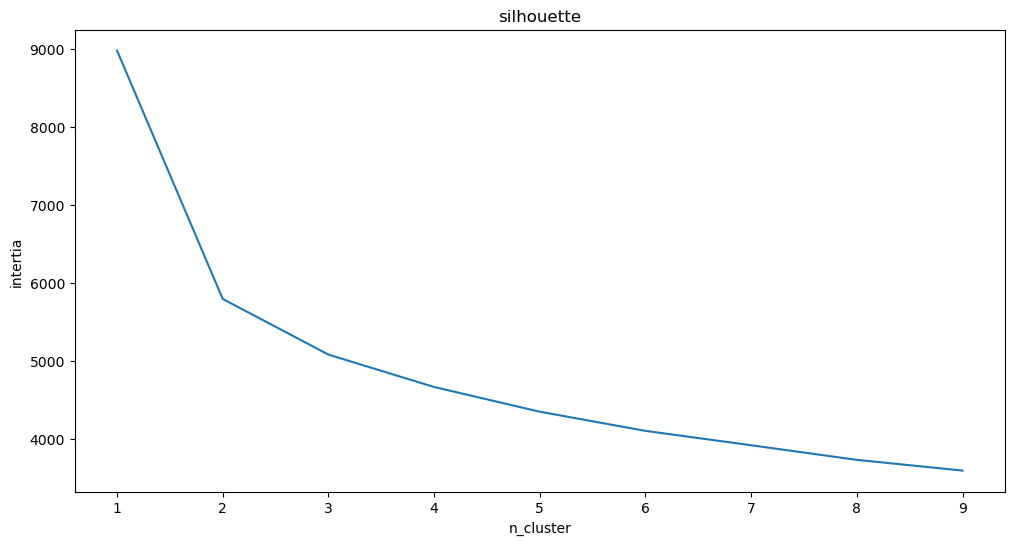

In [476]:
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
X = billets_impute_df
k_list = range(1, 10)
# run the cluster analysis
sum_of_squared_distances = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, sum_of_squared_distances)
plt.title('silhouette')
plt.show()

In [477]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X,['1','2'])
y_accuracy = kmeans.fit_predict(X,[True,False])
centroids = kmeans.cluster_centers_
#X_df = pd.DataFrame(X, columns = Columns_name)

In [478]:
y = billets['is_genuine']
print("score ",round(r2_score(y_accuracy,y)*100,3),"%" )

score  93.079 %


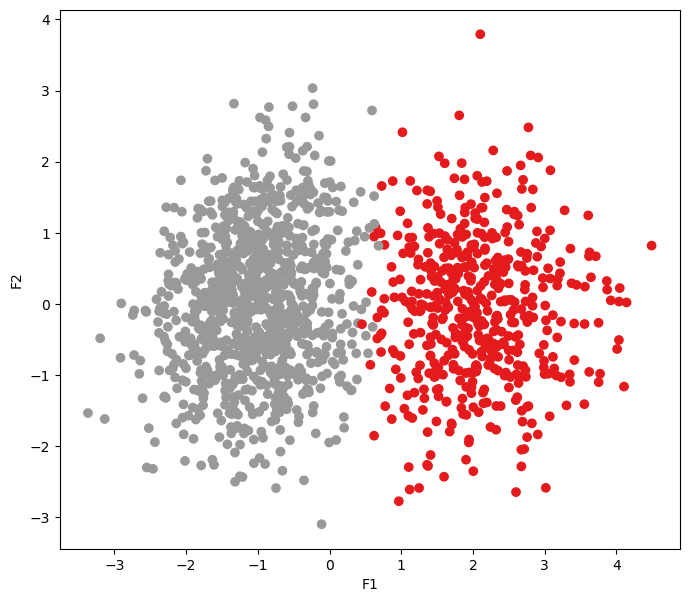

In [479]:
labels = kmeans.labels_
fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1")
ax.set_xlabel("F1")
ax.set_ylabel("F2")
#plt.title('Répartition des billets en deux groupes')
plt.show()

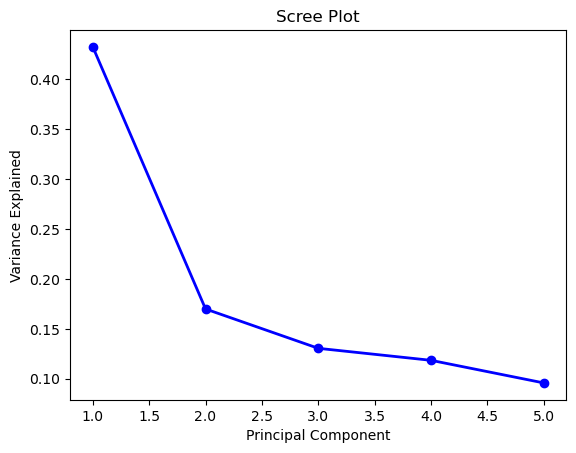

In [480]:
#PCA - scree plot
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
reduced = pca.fit_transform(X)

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [481]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)
#X_proj = kmeans.fit_transform(X)
X_proj = pd.DataFrame(X_proj, columns = ['P1','P2'])#'diagonal',
                         #                'height_left','height_right', 'margin_low', 'margin_up','length'])
X_proj[:10]

,P1,P2
0,1.648380,0.745089
1,-2.016924,-2.206848
2,-0.970658,2.621589
3,-1.370568,-1.819535
4,0.154316,-0.568273
5,-0.696792,0.427996
6,0.175534,1.302924
7,-1.148850,-0.383047
8,-0.850810,1.443178
9,-0.593032,1.742188


In [482]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)
# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids)
# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2"], 
                              index=["cluster_0", "cluster_1"])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


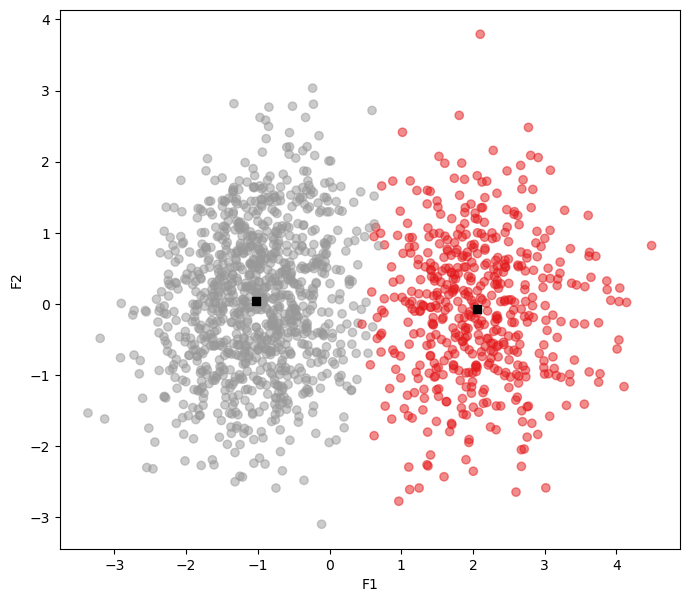

In [483]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

# On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)#
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )
# On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
#ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()



Modélisation supervisée

In [484]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X = billets_impute_df#billets.drop(['is_genuine'],axis=1)#.values.reshape(m,6)
y = billets['is_genuine']#.values.reshape(m,1)
predtrain = y
#print(X)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2)

modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(Xtrain, ytrain)

#modele_logit.fit(Xtrain, ytrain)
pred_train = modele_logit.predict(Xtrain)
pred_train
from sklearn.metrics import accuracy_score
print('accuracy score de ',round(accuracy_score(ytrain, pred_train),4),'%')

accuracy score de  0.9925 %


In [485]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = billets_impute_df#billets.drop(['is_genuine'],axis=1)#.values.reshape(m,6)
y = billets['is_genuine']#.values.reshape(m,1)

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(X), columns= Columns_name)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2)

mycols = ['diagonal','height_left','height_right','margin_low','margin_up','length']
numerical_pipeline = Pipeline(
    steps=[
#        ("selector", ColumnTransformer([("selector", "passthrough", mycols)])),
#    ("scaler", StandardScaler()),
    ('imputer',IterativeImputer(estimator=LinearRegression(),missing_values=np.nan)),
    ("KNC", LogisticRegression()
    )
                                       ]
                                         )

numerical_pipeline.fit(Xtrain, ytrain)
pred_train = numerical_pipeline.predict(Xtrain)
pred_test = numerical_pipeline.predict(Xtest)
features = pd.DataFrame(pred_train)#, columns= Columns_name)

In [486]:
from sklearn.metrics import accuracy_score
print('accuracy score de KN ',round(accuracy_score(ytest, pred_test),3),'%')

accuracy score de KN  0.997 %


In [487]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
resultat_OLS = model.summary()
print(resultat_OLS)

                                 OLS Regression Results                                
Dep. Variable:             is_genuine   R-squared (uncentered):                -717.493
Model:                            OLS   Adj. R-squared (uncentered):           -720.379
Method:                 Least Squares   F-statistic:                             -248.7
Date:                Thu, 04 Jan 2024   Prob (F-statistic):                        1.00
Time:                        17:06:51   Log-Likelihood:                         -1576.4
No. Observations:                1500   AIC:                                      3165.
Df Residuals:                    1494   BIC:                                      3197.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Crossvalidation

In [488]:
import pickle
##make Pickle File
pickle.dump(numerical_pipeline,open('model.pkl', 'wb'))  

In [489]:
#crossvalidation
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
Log_R_score = cross_val_score(LinearRegression(), features, ytrain, cv=4, scoring="r2")
R_F_R_score = cross_val_score(RandomForestRegressor(), features, ytrain, cv=4, scoring="r2")
print(" Log_R ",Log_R_score)
print(" R_F_R_score ",R_F_R_score)
array = np.vstack((Log_R_score, R_F_R_score))
df = pd.DataFrame(array) 
#print(df)
#desc_df = df.describe() #.loc[billets['is_genuine']==False]
#desc_df
#df["avg"] = (df[0]+df[1]+df[2]+df[3]+df[4])/5
print(1-np.std(df, axis=1))
#df
#from sklearn.metrics import mean_absolute_error #MAE valeur absolu
#mean_absolute_error(ytrain, ytrained2)
#from sklearn.metrics import mean_squared_error # RMSE root mean squared Error
#np.sqrt(mean_squared_error(ytrain, ytrained2))
#from sklearn.metrics import mean_squared_error # MSE Mean squared Error dans l'unité de la target
#mean_squared_error(ytrain, ytrained2)


 Log_R  [0.95584107 0.92787047 0.99898406 0.9239009 ]
 R_F_R_score  [0.95584798 0.92789119 0.99906178 0.9238986 ]
0    0.970027
1    0.970000
dtype: float64


In [490]:
ytrain

547      True
1072    False
889      True
800      True
398      True
        ...  
1126    False
685      True
284      True
427      True
382      True
Name: is_genuine, Length: 1200, dtype: bool

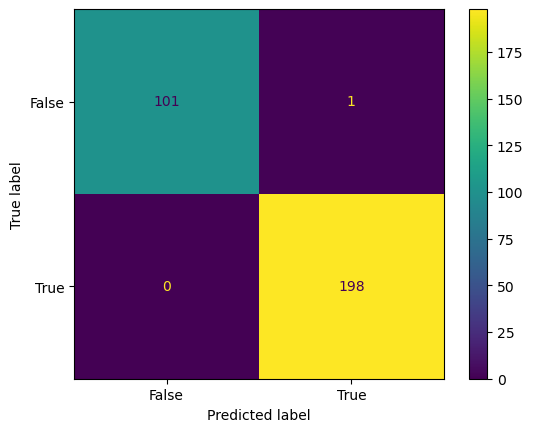

In [497]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(ytest, pred_test)#, labels=["ant", "bird", "cat"])
#print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True])
cm_display
cm_display.plot()
plt.show()

In [492]:
pred_test = numerical_pipeline.predict(Xtest)

In [498]:
accuracy_score(ytest,pred_test)

0.9966666666666667

In [495]:
billets_production_df = pd.read_csv("billets_test.csv")
billets_production_df = billets_production_df.drop(['id'], axis = 1)

scaler = StandardScaler()
billets_production_scaler_df = pd.DataFrame(scaler.fit_transform(billets_production_df), columns= Columns_name)
billets_production_scaler_df
#billets_production_df

,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.239509,-0.639418,-1.050164,-0.660639,-0.937158,1.046311
1,-1.586571,0.552718,0.241021,0.730180,-0.137145,-0.518587
2,-0.297482,-1.452239,-0.964085,-1.577314,0.777156,1.274764
3,0.892446,0.065026,0.068863,1.204322,1.462881,-1.341015
4,-0.247902,1.473914,1.704365,0.303451,-1.165733,-0.461474


In [496]:
predict = numerical_pipeline.predict(billets_production_scaler_df)
predict

array([ True, False,  True, False, False])